In [58]:
import os
from pymongo.mongo_client import MongoClient
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
load_dotenv()
uri = os.environ['DB_URI']
client = MongoClient(uri)
db = client.rosen
collection = db["big_data"]

In [60]:
file = collection.find_one({"_id": "01c70e2e-144c-4719-8095-17d2fd2a5e3b"}, {"_id": 1, "measuring_points": 1})

In [61]:
df = pd.DataFrame(file.get("measuring_points"))
df.head()

,defect_channel,distance,magnetization,timestamp,velocity,wall_thickness
0,0.0,0.000000,3.994557,3.305400e+08,0.211564,3.431764
1,0.0,0.424424,3.654708,3.305408e+08,0.513044,1.634526
2,0.0,0.848849,7.106522,3.305415e+08,0.649755,4.325647
3,0.0,1.273273,3.141520,3.305423e+08,0.597740,3.198899
4,0.0,1.697698,2.769123,3.305430e+08,0.735393,2.290471


In [62]:
df["Zeit"] = pd.to_datetime(df["timestamp"], unit="s") #convert unix timestamp to date
df = df.loc[df['magnetization'] != b'Easteregg :)'] # filter easteregg
df.head()

,defect_channel,distance,magnetization,timestamp,velocity,wall_thickness,Zeit
0,0.0,0.000000,3.994557,3.305400e+08,0.211564,3.431764,1980-06-22 16:40:27.940336227
1,0.0,0.424424,3.654708,3.305408e+08,0.513044,1.634526,1980-06-22 16:52:50.557434380
2,0.0,0.848849,7.106522,3.305415e+08,0.649755,4.325647,1980-06-22 17:05:13.174532533
3,0.0,1.273273,3.141520,3.305423e+08,0.597740,3.198899,1980-06-22 17:17:35.791630685
4,0.0,1.697698,2.769123,3.305430e+08,0.735393,2.290471,1980-06-22 17:29:58.408728838


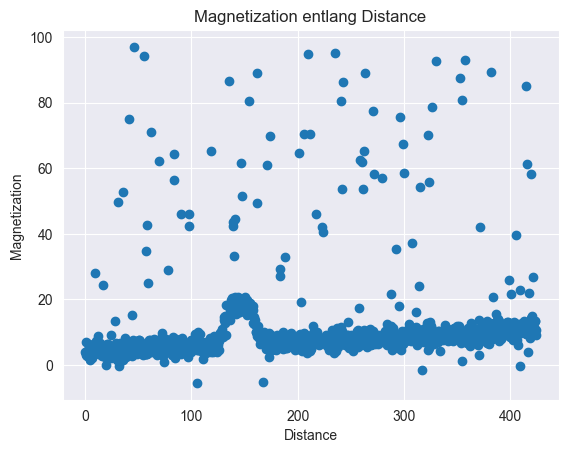

In [63]:
df.set_index("distance")
df.sort_index()
plt.plot(df['distance'], df['magnetization'], marker='o', linestyle='')
plt.xlabel('Distance')
plt.ylabel('Magnetization')
plt.title('Magnetization entlang Distance')
plt.show()